In [1]:
##loading dependencies
!pip install xlrd matplotlib pandas numpy scipy > /dev/null 2>&1


# Signing at the beginning makes ethics salient and decreases dishonest self-reports in comparison to signing at the end

Credit: @Data Colada, Shu Et Al. 2012



In many areas of life, companies and governments rely on systems of trust which are often susceptible to misuse. Take for example tax reporting. The IRS has identified a significant tax gap of between $ \$400 $ and $ \$700 $ billion, with roughly 80% attributed to underreported income on tax forms.

<img src="https://raw.githubusercontent.com/sensesensibilityscience/datascience/master/2024/bad_science/data/1040.png" 
        alt="tax gap table" 
        width="500" 
        style="display: block; margin: 0 auto" />


Your peers have come up with a clever idea which may be able to address this far reaching problem – **what if instead of the standard honesty pledge at the bottom of a form we included it at the top?**

<img src="https://raw.githubusercontent.com/sensesensibilityscience/datascience/master/2024/bad_science/data/taxgap.png" 
        alt="1040 form" 
        width="500" 
        style="display: block; margin: 0 auto" />
<center>
    <i>
    Example of the IRS form 1040 with the “honesty pledge” at the bottom.
        </i>
</center>


After all, having individuals sign an honesty pledge at the top of a document can prompt early self-reflection and align their behaviors with societal honesty norms before starting the task – potentially increasing accurate reporting. In contrast, a pledge at the bottom may be less effective, as it comes after actions have already been taken, reducing its impact on behavior.

Given this information we seek to construct a field experiment to test our hypothesis. Partnering with an insurance firm we seek to test our hypothesis that signing a honesty pledge at the top of some self reported document increases honesty in self reporting odometer mileage for car insurance.


**Question 1**
How would you design such an experiment to test our claim? Give a brief descriptive outline.

*Replace This Text*

One of your peers has conducted the experiment and collected the data as follows: 

In the study, $N = 13,488$ drivers who were renewing their insurance were randomly sent one of two policy review forms randomly: 
1) featuring the standard placement of the statement "I promise that the information I am providing is true" at the document's **bottom**
2) featuring the same statement relocated to the **top**.

In the forms, they were asked to report the **odometer mileage** of their cars covered by the insurer, based on the reasoning that individuals are inherently motivated to lie on these forms -- as reporting lower mileage implies lower insurance premiums. Remember, **our claim was that those who signed at the top were less inclined to lie than those who signed at the bottom.**

The study utilized a datafile from an insurance company containing policy identifiers, experimental conditions, and two sets of odometer readings per car, without the dates of the initial readings – this may create some noise in the data. Odom Reading $x$ (Previous) refers to the mileage that had been previously reported for the $x$ vehicle provided by the insurance firm and Odom reading $x$ (Update) is our dependent variable which is the new self-reported mileage after the sign top or sign bottom form was administered during the renewal (on average approx. 2 years after "Previous"). 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_excel('data/DrivingdataAll.xls')
df = df.iloc[:, :13]
df

,OMR Version,Policy # (masked),Odom Reading 1 (Previous),Odom Reading 1 (Update),Odom Reading 2 (Previous),Odom Reading 2 (Update),Odom Reading 3 (Previous),Odom Reading 3 (Update),Odom Reading 4 (Previous),Odom Reading 4 (Update),Odom Reading All (Previous),Odom Reading All (Update),Diff All
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,16862.0,59292.0,42430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,31680.5,54183.5,22503.0
13484,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,11536.5,41911.5,30375.0
13485,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,60190.0,86243.0,26053.0
13486,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,29884.0,35459.0,5575.0


**Question 2**
Given our claim how should we construct our [null](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html?highlight=null+hypothesis#step-1-the-hypotheses) and [alternative](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html?highlight=null+hypothesis#step-1-the-hypotheses) hypothesis? Consider what a higher average miles driven between one group and another would imply.

*Replace This Text*

**Question 3**
Is this a randomized controlled trial? Why or why not?

*Replace This Text*

**Task 1**
Let's just consider the first car, remember we wish to test to see if there is a difference between our two groups sign top and sign bottom. First find the mean and standard deviation in the difference for "Odom Reading 1 (Update)" and "Odom Reading 1 (Previous)" between the two groups. Then test your hypothesis using a T-Test. You might find more information about performing T-Tests here.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [47]:
df['Difference'] = df['Odom Reading 1 (Update)'] - df['Odom Reading 1 (Previous)']

df_top = df[df['OMR Version'] == 'Sign Top']
df_bottom = df[df['OMR Version'] == 'Sign Bottom']

mean_top = df_top['Difference'].mean()
sd_top = df_top['Difference'].std()

mean_bottom = df_bottom['Difference'].mean()
sd_bottom = df_bottom['Difference'].std()

print(f"Top Signers Mean: {mean_top}, SD: {sd_top}")
print(f"Bottom Signers Mean: {mean_bottom}, SD: {sd_bottom}")

from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(df_top['Difference'], df_bottom['Difference'], equal_var=False)

print(f"T-Statistic: {round(t_statistic, 3)}")
print(f"P-Value: {round(p_value, 25)}")


Top Signers Mean: 26204.828253223917, SD: 14226.320846470433
Bottom Signers Mean: 23622.54606842737, SD: 14505.809749260583
T-Statistic: 10.435
P-Value: 2.0000000000000003e-25


**Question 3** Based on your results should we reject our null hypothesis? What does this tell us about signing at the top vs the bottom and how certain are you of our effect size? How should companies and agencies interpret these results and act upon it?

*Replace This Text*

**Recall: Publishing & Peer Review (10.2):**
New results are evaluated by other experts in the same field to determine whether they are valid. This only reduces confirmation bias insofar as reviewers don't share the same biases.

**Question 4**
Now: take the role of a [peer-reviewer](https://www.pnas.org/reviewer). Please reflect and evaluate the research design, collection, analysis and outcome of our findings above. Are there any inconsistencies that immediately stand out?

*Replace This Text*

Sometimes, faults in studies aren't in their design but rather in the interpretation or underlying data of the experiment. In this lab we'll learn about pathological science and fraudulent and tools we can use to detect them and why certain researchers may be incentivized or pushed to output fraudulent or pathological science papers.

# Investigation #1: Random Assignment?
Why is it important for treatments to be randomly assigned? Recall when we evaluated our mean and standard devation of differences of each group, let's exaime it closer here. 
Randomly assigning treatments (think what is our treatment here?) in experiments ensures that each participant has an equal chance of receiving any treatment, minimizing selection bias. This randomness helps create groups that are similar in all respects except for the treatment, allowing any differences in outcomes to be attributed to the treatment itself. Without randomization, pre-existing differences between groups could influence the results, making it hard to tell if changes are due to the treatment or other factors. In statistical speak, we are trying to maintain "internal validity".

**Question 5**
If treatments were randomly assigned, would we expect the baseline means (prior to any treatment) to be similar across the groups (in this case "Previous column" between sign top and bottom)? In an experiment comparing a treatment (sign top) to a non-treatment (sign bottom), should the groups have similar attributes before administering the treatment?

*Replace This Text*

**Task 2** Calculate the mean and SD for our previous columns for each of our groups (sign top and sign bottom)

In [36]:
##Your code here.

##Soln:
mean_by_version = df.groupby('OMR Version')['Odom Reading All (Previous)'].mean()
print(mean_by_version)

# Split the data into two groups: Sign Top and Sign Bottom
df_top = df[df['OMR Version'] == 'Sign Top']
df_bottom = df[df['OMR Version'] == 'Sign Bottom']



OMR Version
Sign Bottom    75034.497687
Sign Top       59692.705940
Name: Odom Reading All (Previous), dtype: float64


Let's plot the distributions of each of our groups!

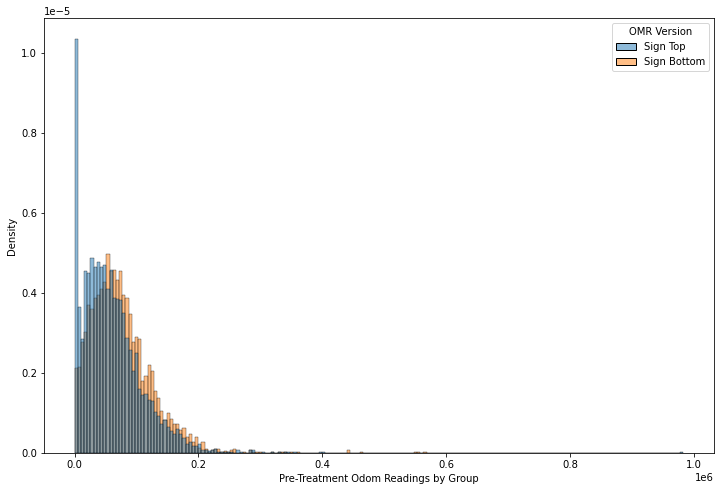

In [29]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="Odom Reading All (Previous)", hue="OMR Version", stat="density")
plt.xlabel("Difference between previous and updated odom reading")
plt.xlabel("Pre-Treatment Odom Readings by Group")
plt.show()

**Question 6** Do these figures match your expectations? Does it suggest the experiment used random assignment effectively? Discuss whether and how the observed differences in baseline (pre treatment) odometer readings could impact the validity of the experiment's conclusions about the treatment effect (recall, what are we testing in our hypothesis test previous?).


*Replace This Text*

# Investigation #2: Distribution of Miles Driven
**Question 7** How would you expect the distribution of miles driven between a year to be? Assign distribution type to either the string A, B, C, or D. </br></br>
*Hint: Recall our discussion about the distribution of heights a weeks lessons ago. Did we see an equal amount of people in each height categories? Are we more likely to extreme heights or average ones? How does this relate to what we're asking here?*</br></br>
A. Uniform</br>
B. Normal</br>
C. Left Skewed</br>
D. Right Skewed</br>

What would the interpretation be for each of the distributions? Why does the one you selected best reflect what we expect to happen in real life?

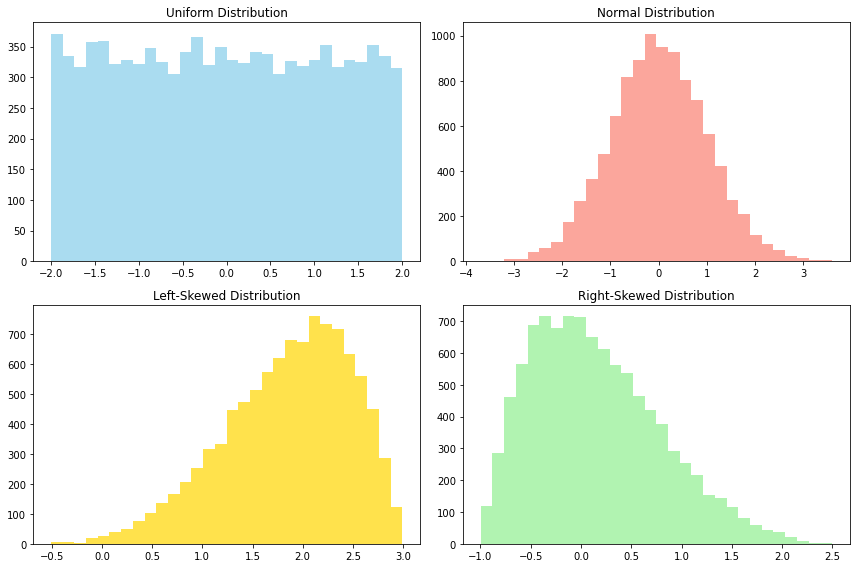

In [39]:
np.random.seed(0)
data_uniform = np.random.uniform(-2, 2, 10000)
data_normal = np.random.normal(0, 1, 10000)
data_left_skewed = stats.beta(2, 5).rvs(10000) * 4 - 1 
data_right_skewed = stats.beta(5, 2).rvs(10000) * 4 - 1

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

#UNIF
ax[0, 0].hist(data_uniform, bins=30, color='skyblue', alpha=0.7)
ax[0, 0].set_title('Uniform Distribution')

#NORM
ax[0, 1].hist(data_normal, bins=30, color='salmon', alpha=0.7)
ax[0, 1].set_title('Normal Distribution')

#LSKEW
ax[1, 0].hist(data_right_skewed, bins=30, color='gold', alpha=0.7)
ax[1, 0].set_title('Left-Skewed Distribution')

#RSKEW
ax[1, 1].hist(data_left_skewed, bins=30, color='lightgreen', alpha=0.7)
ax[1, 1].set_title('Right-Skewed Distribution')


plt.tight_layout()
plt.show()

In [21]:
distribution_type = '...' #replace ... with A, B, C or D.

What would each distribution's real life interpretation be? Why does the one you selected best reflect what we expect in the real world in the difference in miles driven over a period of time (in this case 2 years)? Are there any distribution that seem implausible?

*Replace this text*

Now let's investigate what our paper's data shows:

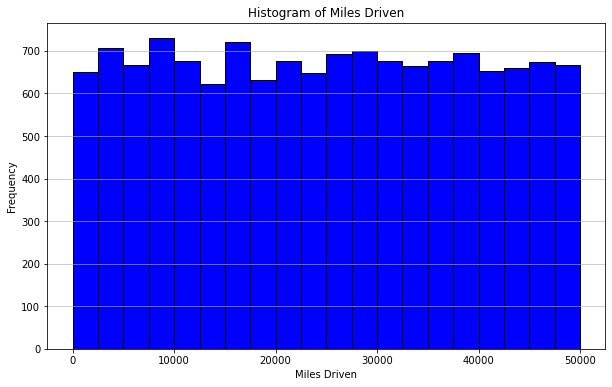

In [22]:
df['Miles Driven'] = df['Odom Reading 1 (Update)'] - df['Odom Reading 1 (Previous)']
df = df.dropna(subset=['Miles Driven'])
df['Miles Driven'] = df['Miles Driven'].clip(lower=0, upper=999999999)
plt.figure(figsize=(10, 6))
plt.hist(df['Miles Driven'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Miles Driven')
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

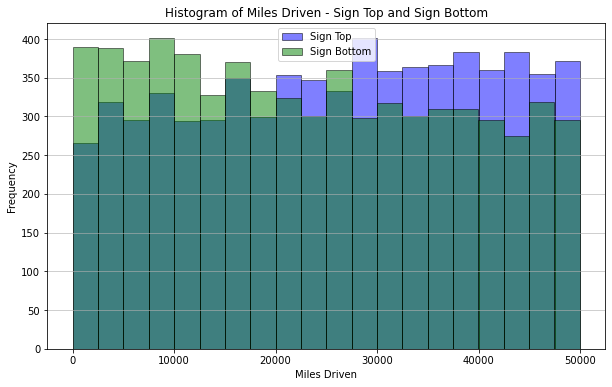

In [43]:
df['Miles Driven'] = df['Odom Reading 1 (Update)'] - df['Odom Reading 1 (Previous)']

df_top = df[df['OMR Version'] == 'Sign Top'].copy()
df_bottom = df[df['OMR Version'] == 'Sign Bottom'].copy()

plt.figure(figsize=(10, 6))
plt.hist(df_top['Miles Driven'], bins=20, color='blue', edgecolor='black', alpha=0.5, label='Sign Top')
plt.hist(df_bottom['Miles Driven'], bins=20, color='green', edgecolor='black', alpha=0.5, label='Sign Bottom')
plt.title('Histogram of Miles Driven - Sign Top and Sign Bottom')
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

**Question 8** Which distribution does this follow most closely. Search online for distributions of distance driven over similar time periods (1-2 years) -- is our graph consistent with those distributions? Discuss what the identified distribution implies about the experiment participants' driving habits.

*Replace This Text*

**Question 9** Think back to response to question 4. Given your findings would, what would you as a peer-reviewer conclude about the paper's findings? What feedback would you provide to the experiment's authors?

*Replace This Text*

# Who is to blame? + Hanlon's Razor

While we may be quick to point fingers at academic misconduct in the context of such evidence but it is important to always consider Hanlon's Razor: "Never attribute to malice that which is adequately explained by stupidity."

Further, read this table from [Edwards et. al.](https://www.liebertpub.com/doi/pdf/10.1089/ees.2016.0223), this paper argues that "incentives for academic scientists have become increasingly perverse in terms of competition for research funding, development of quantitative metrics to measure performance, and a changing business model for higher education itself."

<img src="https://lh3.googleusercontent.com/pw/AP1GczP9iPllfvvvQvc3mXwy_tOadxeUtmroIQkLMYlk2N4haqvuc6aUALwD2G71Vf5RCR7THKl3rLwBxyzKlY4VtO0erwj48VycwbkVe2DmN4-Nc_YNTV6T=w2400" 
        alt="tax gap table" 
        width="500" 
        style="display: block; margin: 0 auto" />

**Question 10** Given these findings, what do you believe can be improved about the current state of academic publishing? How do you think we can improve it?

*Replace This Text*